# Research Paper Clustering

## Setup and Imports

In this section, we import all the necessary libraries and modules required for the project. We also ensure that the `src` directory is included in the Python path to access custom modules.

In [243]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import seaborn as sns
import importlib

from src.data_processing import DataProcessing
import src.clustering
importlib.reload(src.clustering)
from src.clustering import Clustering
from src.evaluation import Evaluation
from src.visualization import Visualization

## Data Extraction and Saving

Here, we initialize the `DataProcessing` class to handle text extraction from PDF files. We extract the abstracts from all PDF files in the specified directory and save the results to a CSV file.

In [99]:
# Initialize data processing
dp = DataProcessing()

# Directory containing raw PDF files
raw_data_dir = 'data/raw'

# Extract abstracts from all PDF files
results = dp.extract_abstracts(raw_data_dir)

# Save the results to a CSV file
output_csv = 'data/processed/abstracts.csv'
dp.save_abstracts_to_csv(results, output_csv)
print(f"Abstracts saved to {output_csv}")

# Display the first few rows of the dataframe
abstracts_df = pd.read_csv(output_csv)
abstracts_df.head()

Extracted text from data/raw/paper_1.pdf:
Coordination Chemistry Reviews 498 (2024) 215468
Available online 10 October 2023
0010-8545/© 2023 Elsevier B.V. All rights reserved.Review 
A review of carbon dots in synthesis strategy 
Huaxin Liu, Xue Zhong, Qing Pan, Yi Zhang, Wentao Deng, Guoqiang Zou, Hongshuai Hou*, 
Xiaobo Ji 
State Key Laboratory of Powder Metallurgy, College of Chemistry and Chemical Engineering, Central South University, Changsha 410083, China   
ARTICLE INFO  
Keywords: 
Carbon dots 
Carbon quantum dots 
Graphene quantum dots 
Synthesis strategy 
Nanomaterials ABSTRACT  
Among the carbon nanomaterials family, the fluorescent carbon dot has emerged as a significant member among 
the novel types of nanomaterials, and many researchers have introduced studies on its properties and potential 
applications. Carbon dots (CDs) have numerous outstanding characteristics, such as remarkable photostability, 
negligible cytotoxicity, exceptional biocompatibility, effortless surf

,File Name,Abstract
0,paper_1.pdf,among carbon nanomaterials family fluorescent ...
1,paper_11.pdf,study evaluates generation transmission storag...
2,paper_12.pdf,paper contributes understanding transformation...
3,paper_13.pdf,government worldwide prioritized carbon reduct...
4,paper_14.pdf,paper provide comprehensive overview state art...


## Load Abstracts

In this section, we load the extracted abstracts from the CSV file into a list and display a sample abstract to ensure the data has been loaded correctly.

In [198]:
# Load abstracts from CSV
abstracts = abstracts_df['Abstract'].tolist()
file_names = abstracts_df['File Name'].tolist()

# Display a sample abstract
print(abstracts[0])

among carbon nanomaterials family fluorescent carbon dot emerged significant member among novel type nanomaterials many researcher introduced study property potential application carbon dot cd numerous outstanding characteristic remarkable photostability negligible cytotoxicity exceptional biocompatibility effortless surface modification remarkable chemical inertness result found extensive application various domain including limited cell imaging vivo imaging drug delivery fluorescence sensing photocatalysis production polychromatic light emitting diode led energy conversion storage etc recently many synthesis strategy carbon dot developed synthesize controlled way still challenging focus article provide overview advancement made production carbon dot particular attention given synthesis technique along discussion provide reference controllable synthesis method selection carbon dot


## Vectorization

Next, we initialize the `Clustering` class and vectorize the abstracts using the TF-IDF vectorizer. We then display the shape of the vectorized text and some examples of vectorized text features and their values.

In [264]:
# Initialize clustering
# clustering = Clustering(vectorizer_type='tfidf')
# clustering = Clustering(vectorizer_type='spacy_word2vec')
# clustering = Clustering(vectorizer_type='bert')

# Test Agglomerative Hierarchical Clustering
clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='hierarchical')
# Test DBSCAN
# clustering = Clustering(vectorizer_type='spacy_word2vec', algorithm='dbscan')
# # Test Spectral Clustering
# clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='spectral')
# # Test Gaussian Mixture Models
# clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='gmm')


# Vectorize abstracts
X = clustering.vectorize_texts(abstracts)

# Display the shape of the vectorized text
print("Number of documents, Number of features: ", X.shape)  # (Number of documents, Number of features)

# Display some examples of vectorized text features and their values greater than 0
if clustering.vectorizer_type == 'tfidf':
    feature_names = clustering.vectorizer.get_feature_names_out()
    vector_values = X[0].toarray()[0]  # TF-IDF returns a sparse matrix
else:
    feature_names = clustering.vectorizer.get_feature_names_out()
    vector_values = X[0]  # Other vectorizers return a dense matrix

# Get indices where the vector values are greater than 0
non_zero_indices = vector_values > 0

# Print the feature names and their corresponding values for non-zero entries
print("Non-zero feature names (words) and their values for the first abstract:")
for feature, value in zip(feature_names[non_zero_indices], vector_values[non_zero_indices]):
    print(f"{feature}: {value}")


Number of documents, Number of features:  (65, 300)
Non-zero feature names (words) and their values for the first abstract:
feature_3: 0.7350605130195618
feature_4: 3.0232532024383545
feature_6: 1.441548228263855
feature_7: 3.560999870300293
feature_10: 5.928955554962158
feature_11: 1.5140557289123535
feature_13: 2.0351359844207764
feature_14: 1.3048800230026245
feature_15: 1.756261944770813
feature_16: 2.664299726486206
feature_17: 1.2026783227920532
feature_21: 1.0301693677902222
feature_29: 0.7081853747367859
feature_30: 1.5253031253814697
feature_31: 1.041671633720398
feature_36: 0.5193151235580444
feature_37: 1.4371514320373535
feature_38: 1.3084865808486938
feature_39: 1.181282639503479
feature_40: 0.22253690659999847
feature_43: 1.325385332107544
feature_45: 2.600585699081421
feature_46: 2.224794626235962
feature_49: 0.048428863286972046
feature_50: 0.541103720664978
feature_51: 2.418764591217041
feature_55: 0.8972079157829285
feature_57: 0.9959827661514282
feature_58: 1.6322700

## Determine Optimal Number of Clusters

In this part, we determine the optimal number of clusters by calculating the Within-Cluster Sum of Squares (WCSS) and silhouette scores for a range of cluster numbers. We then plot the elbow method and silhouette analysis to visualize the results.

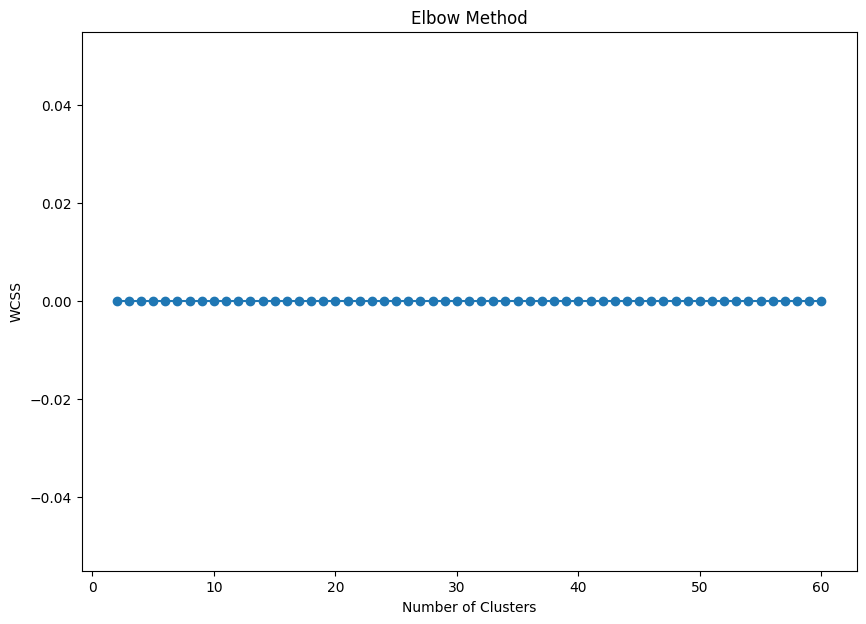

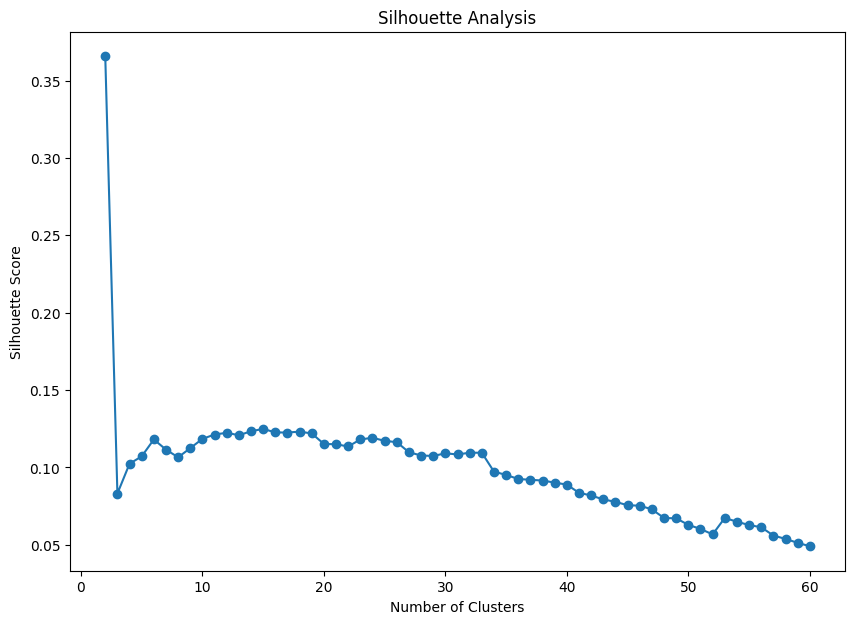

Setting the number of clusters to 10


In [265]:
# Initialize clustering
# clustering = Clustering(vectorizer_type='tfidf')
# clustering = Clustering(vectorizer_type='spacy_word2vec')
# clustering = Clustering(vectorizer_type='bert')

# Test Agglomerative Hierarchical Clustering
clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='hierarchical')
# Test DBSCAN
# clustering = Clustering(vectorizer_type='spacy_word2vec', algorithm='dbscan')
# # Test Spectral Clustering
# clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='spectral')
# # Test Gaussian Mixture Models
# clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='gmm')

# Determine the optimal number of clusters
max_clusters = 60  # Test up to 20 clusters
wcss, silhouette_scores = clustering.determine_optimal_clusters(abstracts, max_clusters=max_clusters)

# Plot elbow method using Evaluation class
Evaluation.plot_elbow_method(wcss)

# Plot silhouette analysis using Evaluation class
Evaluation.plot_silhouette_analysis(silhouette_scores)

# Choose the optimal number of clusters based on silhouette score
# optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
optimal_clusters = 10
print(f"Setting the number of clusters to {optimal_clusters}")

## Clustering and Visualization

Finally, we choose the optimal number of clusters based on the silhouette score and reinitialize the `Clustering` class with this number. We fit and predict the clusters, save the clustering results, and visualize the clusters using t-SNE.

In [266]:
# Initialize clustering
# clustering = Clustering(vectorizer_type='tfidf')
# clustering = Clustering(vectorizer_type='spacy_word2vec', n_clusters=optimal_clusters)
# clustering = Clustering(vectorizer_type='bert', n_clusters=optimal_clusters)

# Test Agglomerative Hierarchical Clustering
clustering = Clustering(n_clusters=optimal_clusters, vectorizer_type='spacy_word2vec', algorithm='hierarchical')
# Test DBSCAN
# clustering = Clustering(vectorizer_type='spacy_word2vec', algorithm='dbscan')
# # Test Spectral Clustering
# clustering = Clustering(n_clusters=optimal_clusters, vectorizer_type='spacy_word2vec', algorithm='spectral')
# # Test Gaussian Mixture Models
# clustering = Clustering(n_clusters=optimal_clusters, vectorizer_type='spacy_word2vec', algorithm='gmm')

# Vectorize abstracts again with optimal clusters
X = clustering.vectorize_texts(abstracts)

# Fit and predict clusters
labels, score = clustering.fit_predict(X)
print(f"Silhouette Score: {score}")

# Save clustering results
output_path = 'data/processed/clustering_results.csv'
clustering.save_results(file_names, abstracts, labels, output_path)
print(f"Clustering results saved to {output_path}")

# Generate and save summary report
summary_output_path = 'data/processed/summary_report.csv'
clustering.generate_summary_report(file_names, abstracts, labels, summary_output_path)
print(f"Summary report saved to {summary_output_path}")

# Display the first few rows of the clustering results
results_df = pd.read_csv(output_path)
results_df.head()

Silhouette Score: 0.11850139498710632
Clustering results saved to data/processed/clustering_results.csv
Summary report saved to data/processed/summary_report.csv


,File Name,Cluster,First 10 Words of Abstract
0,paper_1.pdf,8,among carbon nanomaterials family fluorescent ...
1,paper_11.pdf,4,study evaluates generation transmission storag...
2,paper_12.pdf,6,paper contributes understanding transformation...
3,paper_13.pdf,5,government worldwide prioritized carbon reduct...
4,paper_14.pdf,1,paper provide comprehensive overview state art...


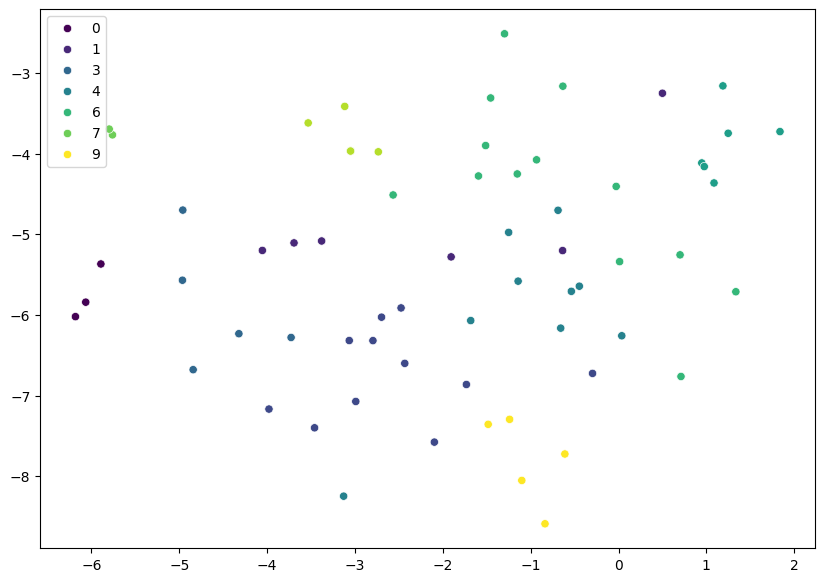

In [267]:
# Visualize clusters
visualization = Visualization()
visualization.visualize_clusters(X, labels)